# Chap6 차원축소

## 01.  차원축소(Dimension Reduction) 개요

- 차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다.
- 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 크다.
- 선형모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.
- 따라서 다차원의 피처를 차원 축소해 피처수를 줄이면 직관적으로 데이터를 해석할 수 있다.

- 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다.

- 피처 선택(특성 선택)
  - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.


- 피처 추출(특성 추출)
  - 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것이다.
  - 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.
  -피처 추출은 기존 피처를 단순 압축이 아닌, 기존 피처가 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미한다.
  - ex) 고등학생의 모의고사 성적, 내신성적, 수능성적, 봉사활동 등의 여러 피처를 학업 성취도, 커뮤니케이션 능력, 문제 해결력과 같은 함축적인 요약 특성으로 추출

- 차원 축소는 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데 의미가 있다.
- 대표적인 차원 축소 알고리즘에는 PCA, SVD, NMF 가 있다.(이미지나 텍스트 차원 축소에 자주 활용)

## 02. PCA(Principal Component Analysis, 주성분 분석)

- PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법이다.
- PCA로 차원을 축소할 때, 기존 데이터의 정보 유실을 최소화하기 위해 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하게 되고, 이것이 PCA의 주성분이 된다.

- PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 한다. 세 번째 축은 다시 두 번째 축과 각각이 되는 벡터를 설정하는 방식으로 축을 생성한다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.

![PCA](https://user-images.githubusercontent.com/72365663/100061705-cff42c00-2e71-11eb-9501-966604169200.jpg)


- PCA는 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.
- 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.
- 이 고유벡터가 PCA의 주성분벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.
- 고유값(eigenvalue)은 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.

- 선형 변환은 특정 벡터에 행렬A를 곱해 새로운 벡터로 변환하는 것을 의미한다.(행렬을 공간으로 가정)

- 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미한다.
- Cov(X, Y) > 0은 X가 증가할 때 Y도 증가한다는 의미이다.
- 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행령이다.

||X|Y|Z|
|------|---|---|---|
|X|**3.0**|-0.71|-0.24|
|Y|-0.71|**4.5**|0.28|
|Z|-0.24|0.28|**0.91**|

- 위 표를 보자. 공분산 행렬에서 대각선 원소는 각 변수(X, Y, Z)의 분산을 의미하며, 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미하낟.
- 즉, X, Y, Z의 분산은 각각 3.0, 4.5, 0.91이고, X와 Y의 공분산은 -0.71, X와Z의 공분산은 -0.24, Y와Z의 공분산은 0.28이다.

- 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭한다.(Ax = ax, A는 행렬 x는 고유벡터 a는 스칼라값)
- 정방행렬은 최대 차원 수 만큼의 고유벡터를 가질 수 있다.(`2*2`행렬은 2개, `3*3`행렬은 3개의 고유벡터를 가질 수 있음)
-이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용된다.

- 공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetric Matrix)이다.
- 정방행렬 : 열과 행이 같은 행렬
- 대칭행렬 : 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬
- 공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다.
- 대칭행렬은 고유값 분해에 있어서, 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있다.

- 입력 데이터의 공분산 행렬을 C라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.

![](https://user-images.githubusercontent.com/72365663/100414887-2eade580-30be-11eb-85f4-66e8fabe6636.JPG)

- 이 때 P는 `n*n`의 직교행렬이며, 시그마는 `n*n` 정방행렬, P^T는 행렬 P의 전치행렬이다.

- 위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응된다.
![](https://user-images.githubusercontent.com/72365663/100415767-425a4b80-30c0-11eb-9701-0dd44dde25db.JPG)

- 공분산C는 `고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬`로 분해된다.
- ei는 i번째 고유벡터를, 람다i는 i번째 고유벡터의 크기를 의미한다.
- e1는 가장 분산이 큰 방향을 가진 고유벡터이며, e2는 e1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터이다.


- **입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으모, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변화하는 방식이 PCA라는 것이다.**
- PCA의 스텝

    1. 입력 데이터 세트의 공분산 행렬을 생성한다.
    2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
    3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터를 변환한다.

- PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것이다.
- 붓꽃(iris)데이터 세트는 sepal length, sepal width, petal length ,petal width 4개의 속성으로 되어 있는데, 2개의 PCA의 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해 보자.


- 먼저 사이킷런의 붓꽃 데이터를 load_iris() API를 이용해 로딩한 뒤 이 데이터를 더 편하게 시각화하기 위해 DataFrame으로 변환해보자.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화해 보자.
- 2차원으로 표현하므로 두 개의 속성인 sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포를 나탄낸다.

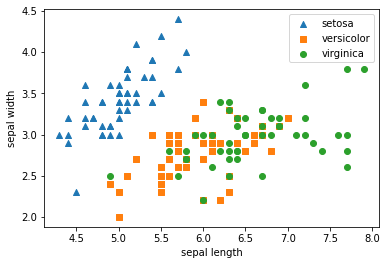

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포되어 있다.
- Versiclor와 virginica의 경우 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.

- 이제 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화해 보자.
- 먼저 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해야 한다.
- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다.
- 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.
- 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

- 이제 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원의 붓꽃 대이터를 2차원 PCA 데이터로 변환해 보자.
- 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공한다. PCA 클래스는 생성 파라미터로 n_components를 입력받는다. n_components는 PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정한다. 이후에 fit과 transform을 호출해 PCA로 변환을 수행한다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


- PCA 객체의 transform() 메서드를 호출해 원본 데이터 세트를 (150,2)의 데이터 세트로 iris_pca 객체 변수로 반환했다.
- iris_pca는 변환된 PCA 데이터 세트를 150*2 넘파이 행렬로 가지고 있다. 이를 DataFrame으로 변환한 뒤 데이터값을 확인해 보자.

In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- 이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화해보자.
- pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 붓꽃 품종이 어떻게 분포되는지 확인해보자.

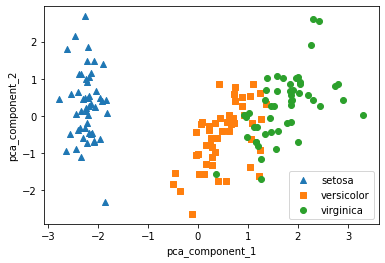

In [ ]:
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능하다.
- Versicolor와 Virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됐다. 이는 PCA 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문이다.
- PCA Component별로 원본 데이터의 변동성을 얼마나 반영하는 알아보자. PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트 별로 변동성 비율을 제공하고 있습니다.

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두 번째인 pca_component_2가 약 22,8%를 차지한다. 따라서 PCA 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.
- 이번에는 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교하겠다. Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교한다. 먼저 원본 붓꽃 데이터에 랜덤 포레스트를 적용한 결과는 다음과 같다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


- 이번에는 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트를 적용해 보겠다.

In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다. 위 붓꽃 데이터의 경우는 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 10% 하락했다. 10%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당부분 유지하고 있음을 알 수 있다.

- 다음으로 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변화한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교해 보겠다.
- 사용할 데이터 세트는 UCI Machine Learning Repository에 있는 신용카드 고객 데이터 세트이다.
- 다운받는 법
    - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 에 접속한다.
    -  **Data Folder** 를 클릭 후 **default of credit card clients.xls** 를 클릭하여 데이터를 다운받는다.
    - 파일명을 credit_card.xls로 바꿔준다.

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
# MY_GOOGLE_DRIVE_PATH = 'My Drive/Class_Python/MachineLearning/data'
MY_GOOGLE_DRIVE_PATH = 'My Drive'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive


In [ ]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', sheet_name='Data', header = 1)
df = df.iloc[:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성을 가지고 있다. 이 중에서 'default payment next month' 속성이 Target 값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0이다.
- 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1으로 칼럼명을 변환하고 'default payment next month'칼럼도 칼럼명이 너무 길어서 'default'로 칼럼명을 변경한다. 이후 Target 속성인 'default' 칼럼을 y_target 변수로 별도로 저장하고 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame으로 만들겠다.

In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

- 해당 데이터 세트는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높다.
- DataFrame의 corr()를 이용해 각 속성 간의 상관도를 구한 뒤 이를 시본의 heatmap으로 시각화하겠다.

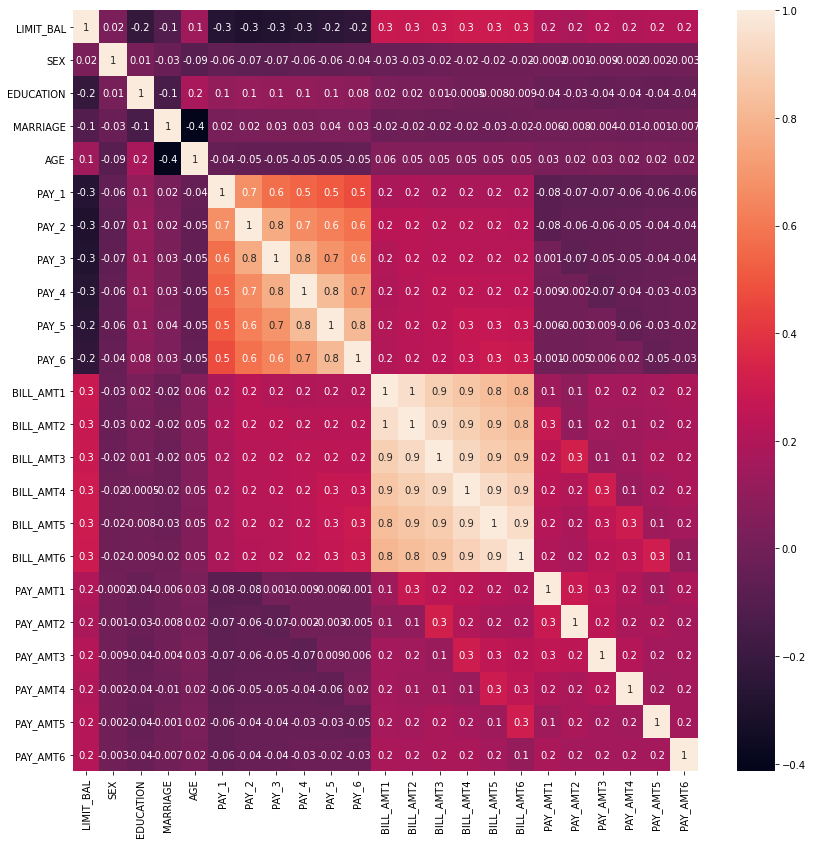

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개의 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있다. 이보다 낮지만 PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높다. 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.
- 이 BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보자.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개의 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다.

- 이번에는 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해 보겠다. 먼저 원본 데이터 세트에 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측했다.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


- 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.71%를 나타냈다. 이번에는 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측을 적용해 보겠다.

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7921 0.7963 0.8024]
PCA 변환 데이터 셋 평균 정확도:0.7969


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트마능로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생했다.

1~2%의 예측 성능 저하는 미비한 성능 저하로 보기는 힘들지만, 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주고 있다.

- PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있지만, 이보다 더 활발하게 적용되는 영역은 컴퓨터 비전(Computer Vision)분야이다.

## 03. LDA(Linear Discriminant Analysis)

### LDA개요
LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사합니다. LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소합니다. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾습니다.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원을 축소합니다. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식입니다. 다음 그림은 좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부의 분산이 작은 것을 표현한 것입니다.

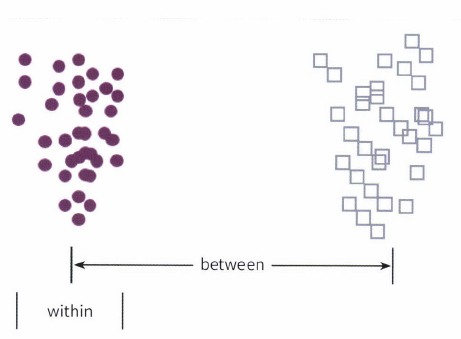

일반적으로 LDA를 구하는 스텝은 PCA와 유사하난 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유백터를 구하고 입력 데이터를 투영한다는 점입니다. LDA를 구하는 스텝은 다음과 같습니다.

 1. 클래스 내부와 클래스 간 분산 행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 백터를 기반으로 구합니다.

 2. 클래스 내부 분산은 행렬을 SW, 클래스 간 분산 행렬을 SB라고 하면 다음 식으로 두 행렬을 고유백터로 분해할 수 있습니다.
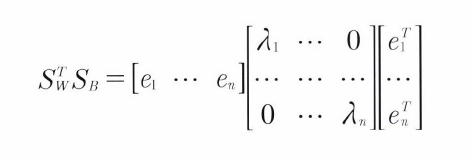
 3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.

 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

### 붓꽃 데이터 세트에 LDA 적용하기

붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화해 보겠습니다.
사이킷런은 LDA를 LinearDiscriminantAnalysis 클래스로 제공합니다. 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링합니다.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하겠습니다. PCA와 다르게 LDA에서 한 가지 유의해야 할점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이라는 것입니다. 즉, 클래스의 결정값이 변환 시에 필요합니다. 다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의하세요.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


이제 LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현해 보겠습니다. 소스 코드는 앞의 PCA 예제와 큰 차이가 없습니다.

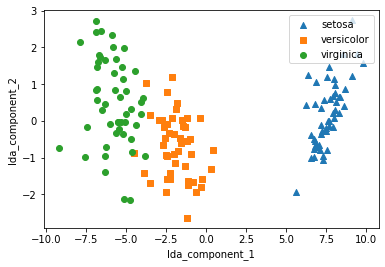

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 04. SVD(Singular Value Decomposition)

### SVD 개요
SVD 역시 PCA와 유사한 행렬 분해 기법을 이용합니다. PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있습니다. 일반적으로 SVD는 m X n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미합니다.

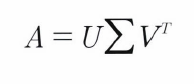

SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 백터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가집니다. Σ는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0입니다. Σ이 위치한 0이 아닌 값이 바로 행렬 A의 특이값입니다. SVD는 A의 차원이 m X n 일 때 U의 차원이 m X m, Σ의 차원이 m X n, V의 차원이 n X n으로 분해합니다.  

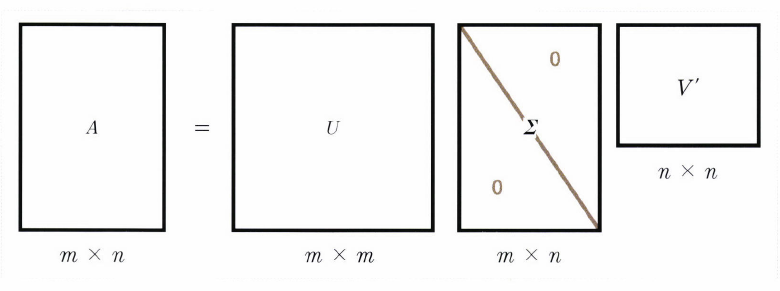

하지만 일반적으로는 다음과 같이 Σ의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된Σ에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용합니다. 이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 m X n일 때, U의 차원을 m X p, Σ의 차원을 p X p, V의 차원을 p X n으로 분해 합니다.

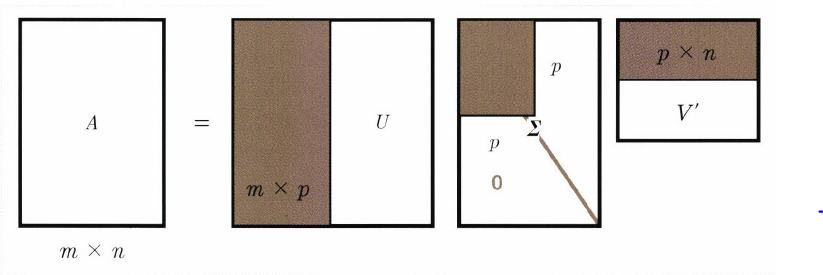

Truncated SVD는 Σ의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것입니다. 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행합니다. 넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD로 분해가 어떤 식으로 되는지 간단한 예제를 통해 살펴보겠습니다.

새로운 주피터 노트불을 생성하고 넘파이의 SVD 모듈인 numpy.linalg.svd를 로딩합니다. 그리고 랜덤한 4 X 4 넘파이 행렬을 생성합니다. 랜덤 행렬을 생성하는 이유는 행렬의 개별 로우끼리의 의존성을 없애기 위해서입니다.

In [ ]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a 행렬에 SVD를 적용해 U, sigma, Vt를 도출하겠습니다. SVD 분해는 nummpy. linalg. svd에 파라미터로 원본 행렬을 입혁하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환합니다. Sigma 행렬의 경우, S=UΣV 에서 Σ행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이아닌 값의 경우만 1차원 행렬로 표현합니다.

In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


U 행렬이 4 X 4, Vt행렬이 4 X 4로 반환됐고, Sigma의 경우는 1차원 행렬인 (4,)로 반환됐습니다.

분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보겠습니다. 원본 행렬로의 복원은 이 U, Sigma, Vt를 내적하면 됩니다. 한 가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭 행렬로 변환한 뒤에 내적을 수행해야 한다는 점입니다.

In [ ]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨을 알 수 있습니다. 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보겠습니다. 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트 하겠습니다.

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이제 a 행렬은 이전과 다르게 로우 간 관계가 매우 높아졌습니다. 이 데이터를 SVD로 다시 분해해 보겠습니다.

In [ ]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했습니다. 즉, 선형 독립인 로우 백터의 개수가 2개라는 의미입니다(즉, 행렬의 랭크가 2입니다). 이렇게 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원해 보겠습니다. 이번에는 U, Sigma, Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원해 보겠습니다. 즉, Sigma의 경우 앞의 2개 요소만 0 이 아니므로 U 행렬 중 선행 두개의 열만 추출하고, Vt의 경우는 선행 두개의 행만 추출해 복원하는 것입니다.

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이번에는 Truncated SVD를 이용해 행렬을 분해해 보겠습니다. Truncated SVD는 Σ행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식입니다. 이렇게 분해하면 인위적으로 더 작은 차원의 U, Σ V로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없습니다. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있습니다. 당연한 얘기지만, 원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원할 수 있습니다. 

Truncated SVD를 사이파이 모듈을 이용해 간단히 테스트해 보겠습니다. Truncated SVD는 넘파이가 아닌 사이파이에서만 지원됩니다. 사이파이는 SVD뿐만 아니라 Truncated SVD도 지원합니다. 일반적으로 사이파이의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated DVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 합니다. 임의의 원본 행렬 6 X 6을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원, SIgma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교해 보겠습니다.

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)   # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

6 X 6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6,6) (6,) (6,6) 차원이지만, Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6,4) (4,) (4,6)로 각각 분해했습니다. Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있습니다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않습니다. 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환합니다. 원본 데이터를 Truncated SVD 방식으로 분해됨 U*Sigma 행렬에 선형 변환해 생성합니다. 새로운 주피터 노트북을 생성하고, 다음 코드를 입력해 붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환해 보겠습니다.

Text(0, 0.5, 'TruncatedSVD Component 2')

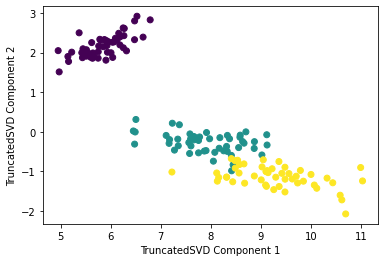

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y= iris_tsvd[:, 1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

왼쪽에 있는 그림이 TruncatedSVD로 변환된 붓꽃 데이터 세트입니다. 오른쪽은 비교를 위해서 PCA로 변환된 붓꽃 데이터 세트를 가져다 놓았습니다. TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있습니다.

사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해합니다. 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있습니다.


Text(0.5, 1.0, 'PCA Transformed')

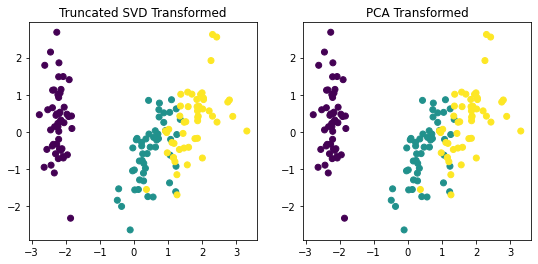

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y= iris_tsvd[:, 1], c= iris.target)
ax2.scatter(x=iris_pca[:, 0], y= iris_pca[:, 1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음을 알 수 있습니다.

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.339760329927998e-15
4.85722573273506e-17


모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있습니다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행합니다. 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미합니다. 하지만 PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능합니다.

SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됩니다. 또한 텍스트의 토픽 모델링 기법인 LSA의 기반 알고리즘입니다.

## 05. NMF(Non-Negative Matrix Factorization)

### NMF 개요
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형입니다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭합니다.

4 X 6 원본 행렬 V는 4 X 2 행렬 W와 2 X 6 행렬 H로 근사해 분해될 수 있습니다. 행렬 분해는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것입니다. 이처럼 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해됩니다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됩니다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬입니다.

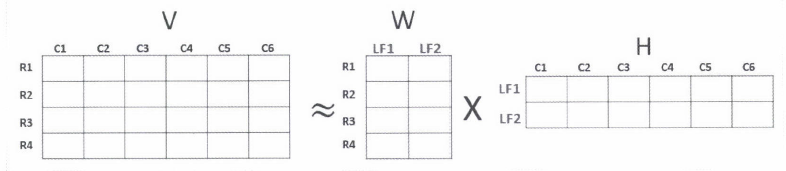

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있습니다. 사이킷런에서 NMF는 NMF 클래스를 이용해 지원됩니다. 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화해 보겠습니다.

Text(0, 0.5, 'NMF Component 2')

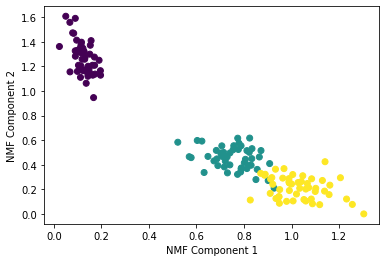

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y= iris_nmf[:, 1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 테그트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됩니다. 또한 영화 추천과 같은 추천 영역에 활발하게 적용 됩니다. 사용자의 상품(예: 영화) 평가 데이터 세트인 사용자 - 평가 순위 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측하고, 높은 순위로 예측되는 상품을 추천해주는 방식입니다(이를 잠재 요소 기반의 추천 방식이라고 합니다).

## 06. 정리
지금까지 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF에 대해서 알아봤습니다. 많은 피처로 이뤄진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있습니다. 무엇보다도 차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있습니다. 이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등의 차원 축소 알고리즘이 활발하게 사용됩니다.

PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식입니다. 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유 백터를 생성하고 이렇게 구한 고유 백터에 입력 데이터를 선형 변환하는 방식입니다. LDA는 PCA와 매우 유사한 방식이며, PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소합니다.

SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법입니다. 특히 이러한 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용됩니다.